# **Кейс: Диспетчерский контроль**
**Команда:** \
Вариант для Семёнчика \
**Участники команды:** \
Плотников Даниил \
Яков Борковец \
Шилов Артем \


# Установка YOLOv8

In [ ]:
import os
HOME = os.getcwd()

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Работа с датасетом
Подзгрузим наш датасет из Roboflow с помощью API

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Oz8zziOQaQHBctzNZknq")
project = rf.workspace("train-detectinon").project("train-detection-od9rd")
version = project.version(4)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Train-detection-4 in yolov8:: 100%|██████████| 454/454 [00:00<00:00, 669.47it/s]


Выведем и проверим количество элементов в нашем датасете:

In [ ]:
dataset_path = f"{HOME}/datasets/Train-detection-4"

#Посчитаем изображения в каждой папке
def count_images(folder_path):
    count = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        count += len([f for f in filenames if f.endswith(('.png', '.jpg', '.jpeg'))])  # Фильтрация по типам изображений
    return count

train_count = count_images(os.path.join(dataset_path, 'train'))
valid_count = count_images(os.path.join(dataset_path, 'valid'))
test_count = count_images(os.path.join(dataset_path, 'test'))

print(f"Количество изображений в train: {train_count}")
print(f"Количество изображений в valid: {valid_count}")
print(f"Количество изображений в test: {test_count}")
print(f"Общее количество изображений: {train_count + valid_count + test_count}")

Количество изображений в train: 201
Количество изображений в valid: 13
Количество изображений в test: 7
Общее количество изображений: 221


# Обучим YOLOv8 на нашем датасете

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 166MB/s]
New https://pypi.org/project/ultralytics/8.3.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Train-detection-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

Далее, выведем метрики нашего обучения

/content


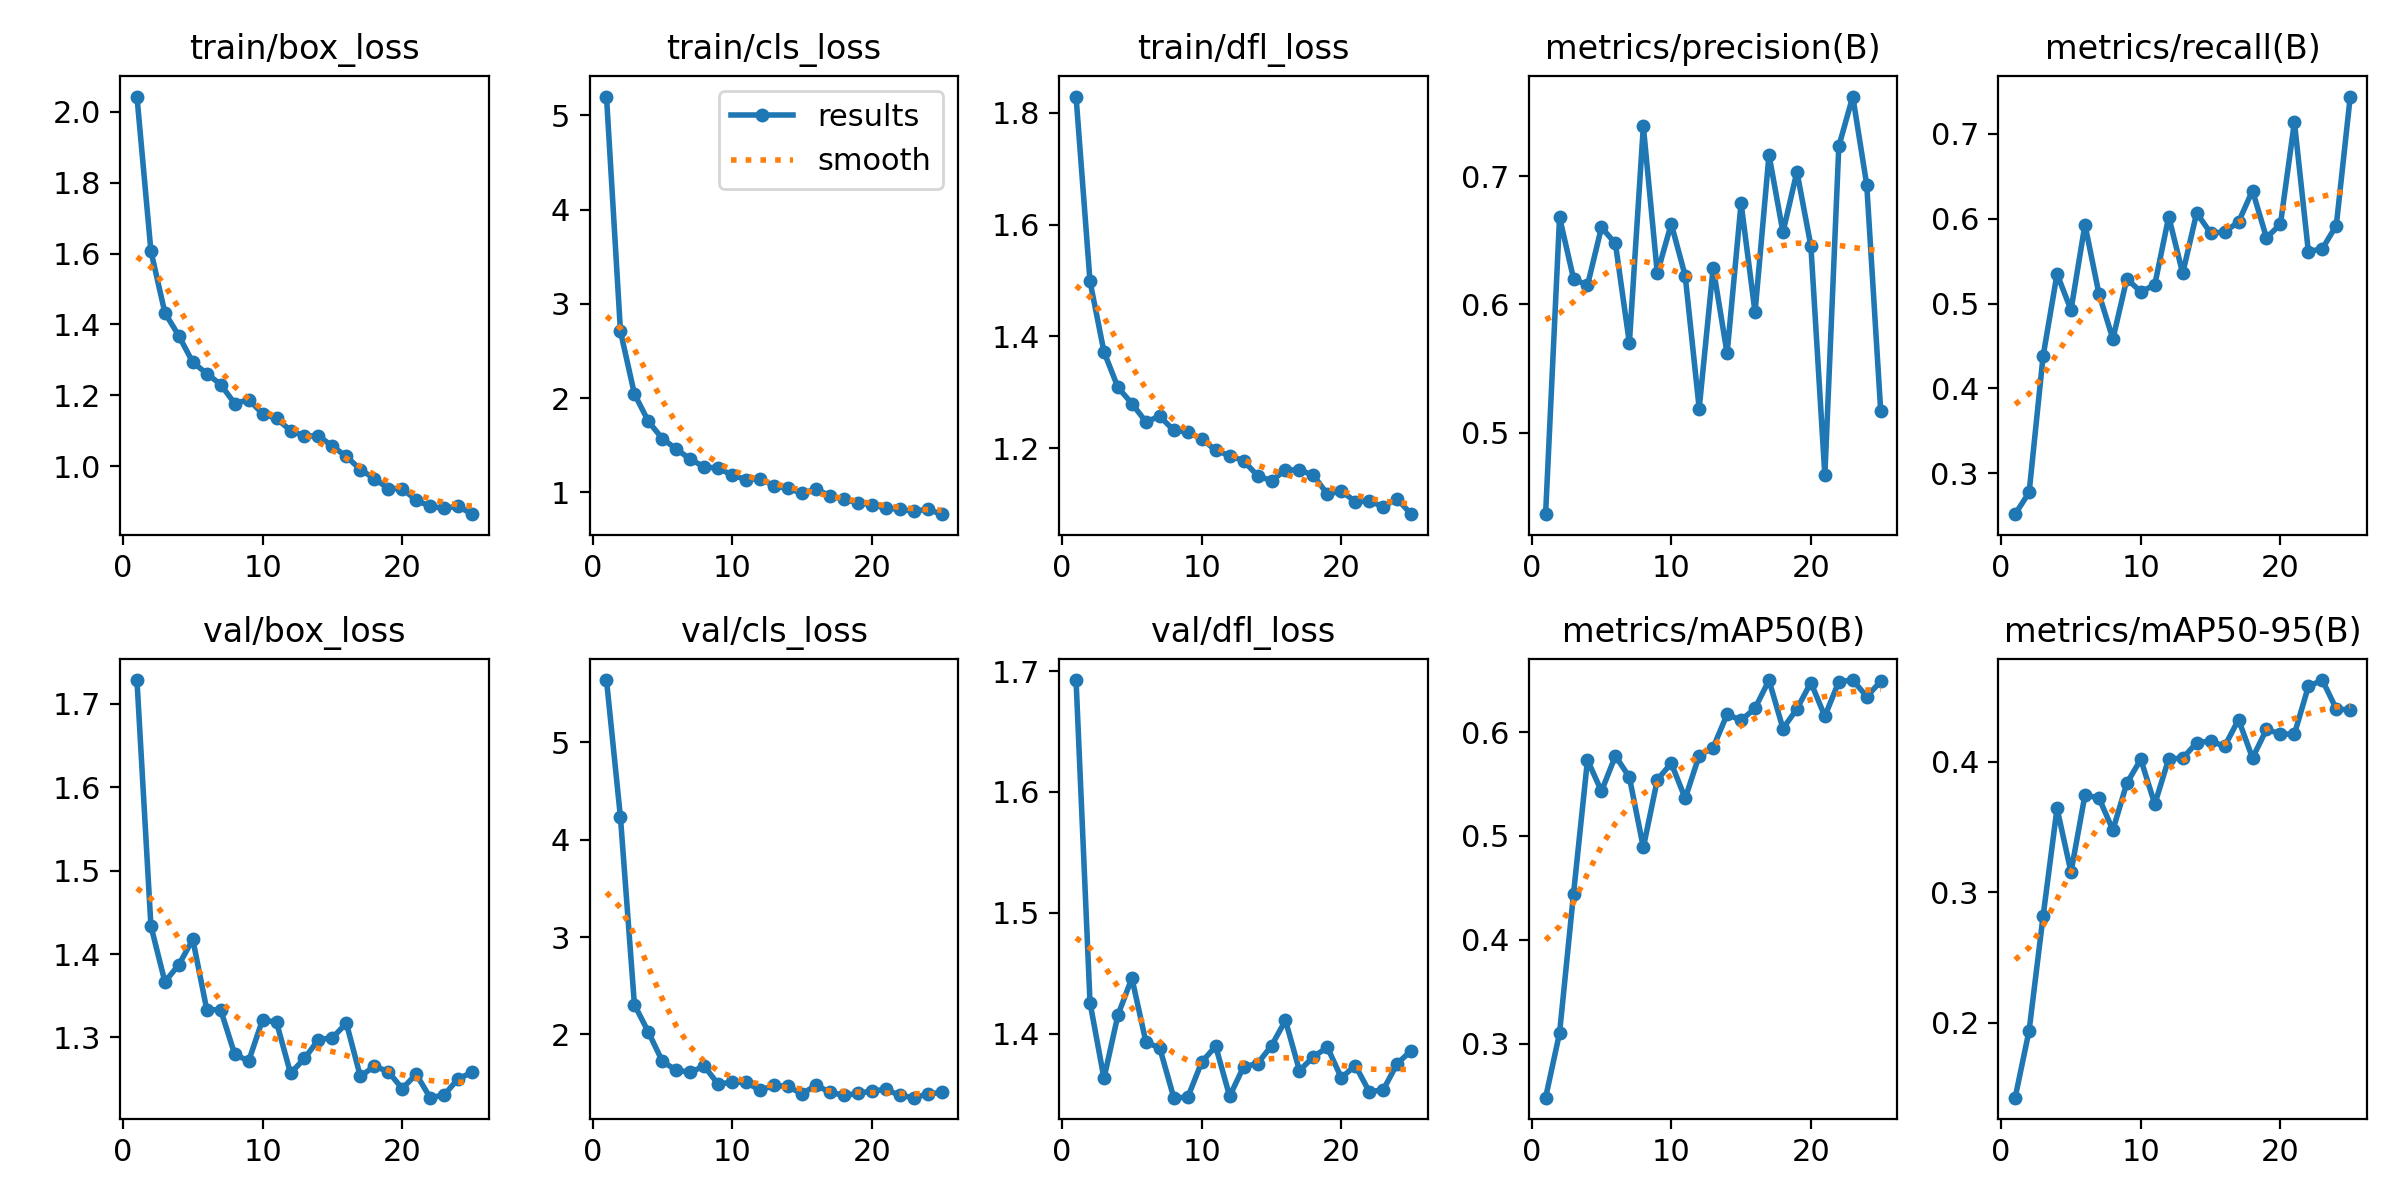

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


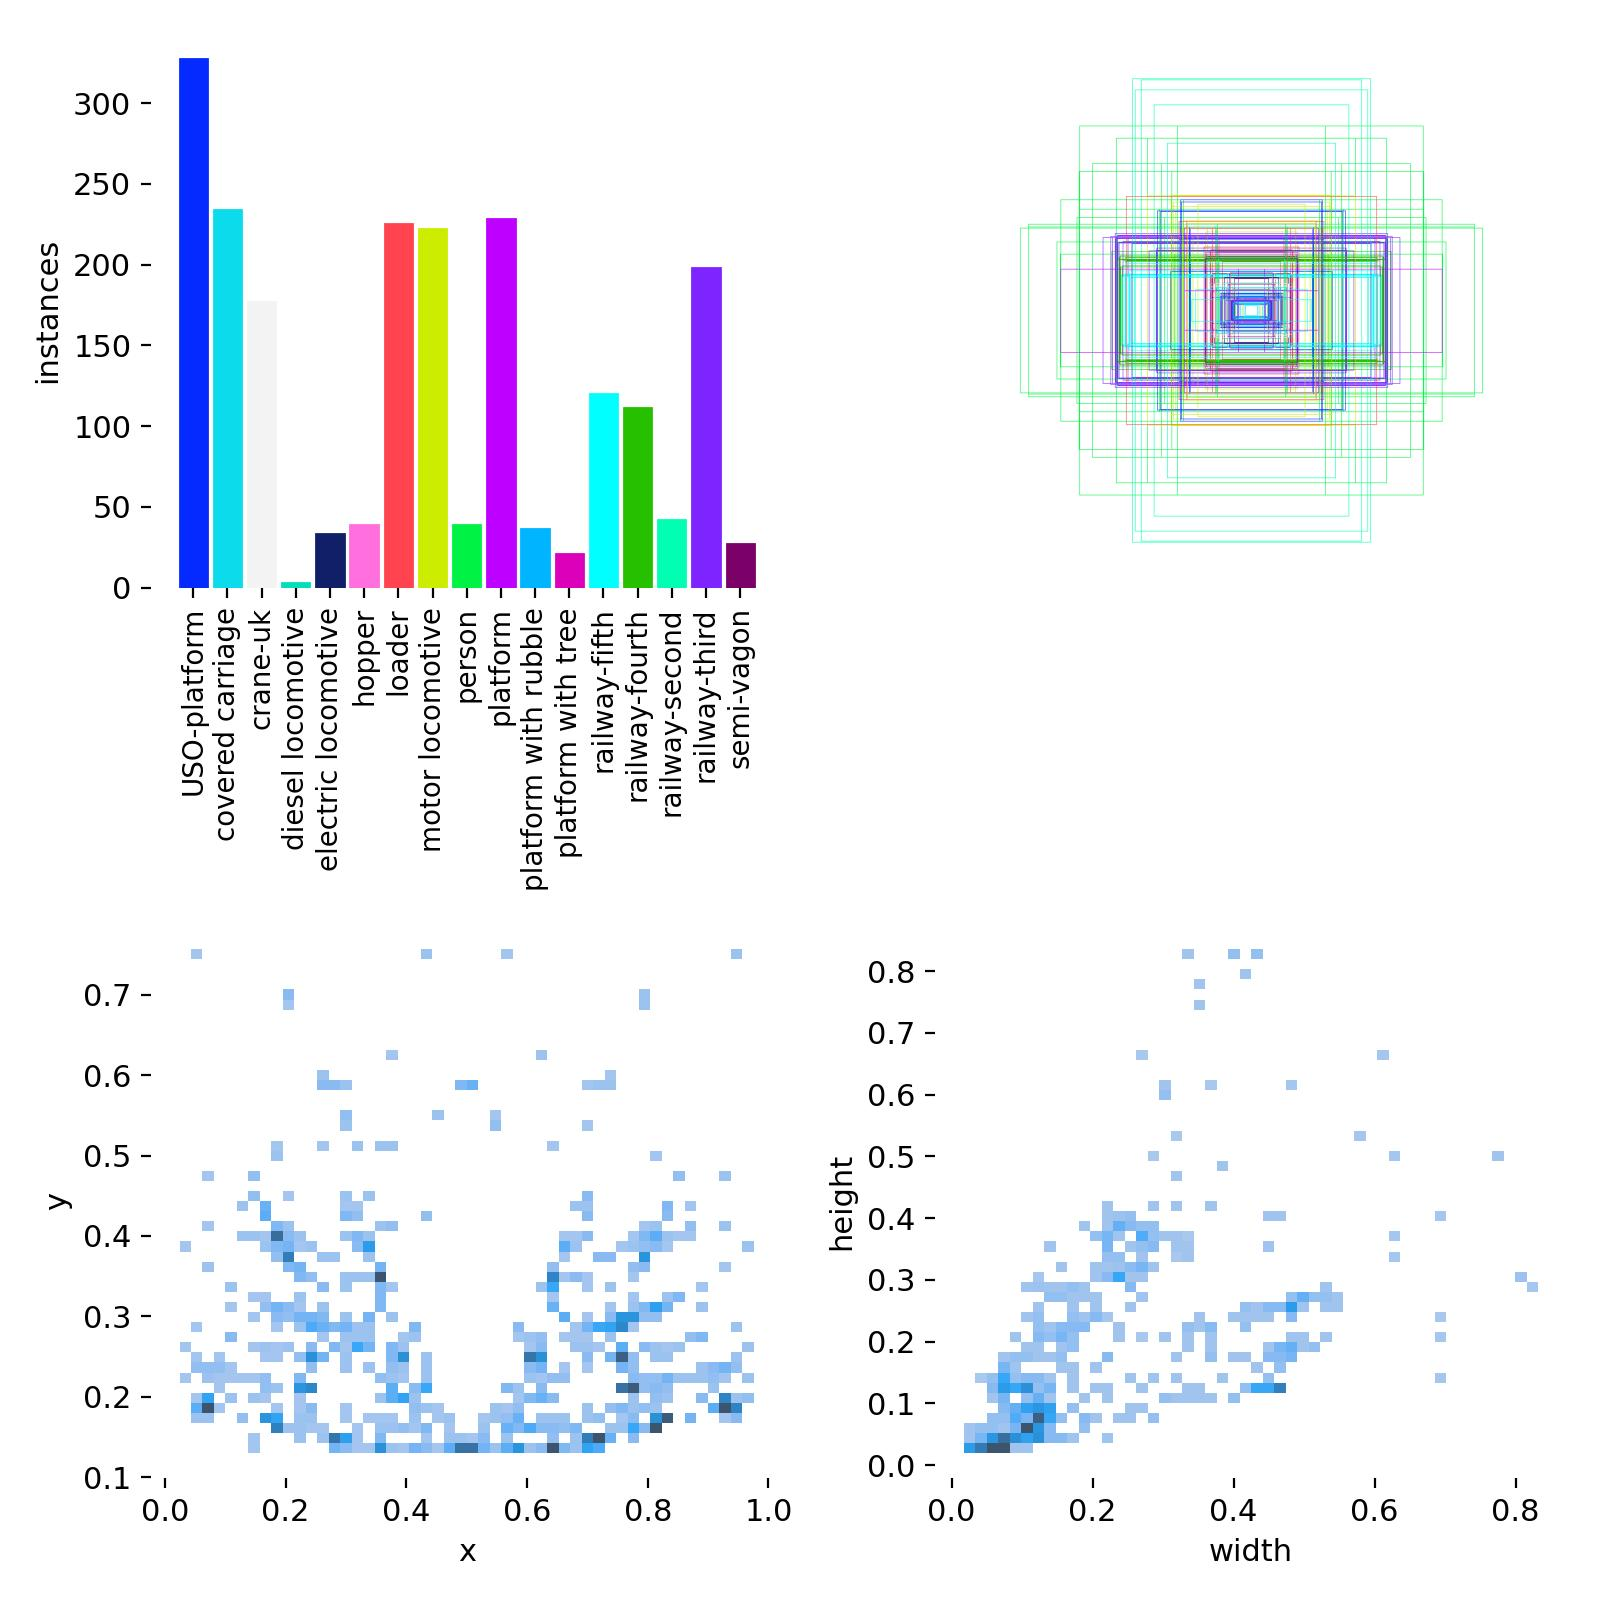

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

# Работа с валидационной выборкой
Проверка модели на валидационной метрике и показ различных метрик

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,132,163 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Train-detection-4/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.09s/it]
                   all         13        124      0.763      0.564      0.651      0.464
          USO-platform         12         28      0.591      0.357      0.566      0.342
      covered carriage          5          8      0.986       0.25       0.49      0.293
              crane-uk          7          9      0.779      0.783       0.88      0.632
   electric locomotive          5          5      0.876        0.6      0.761      0.532
                hopper          4         11      0.923      0.455      0.584       0.27
                loader   

Precission-Recall curve

/content


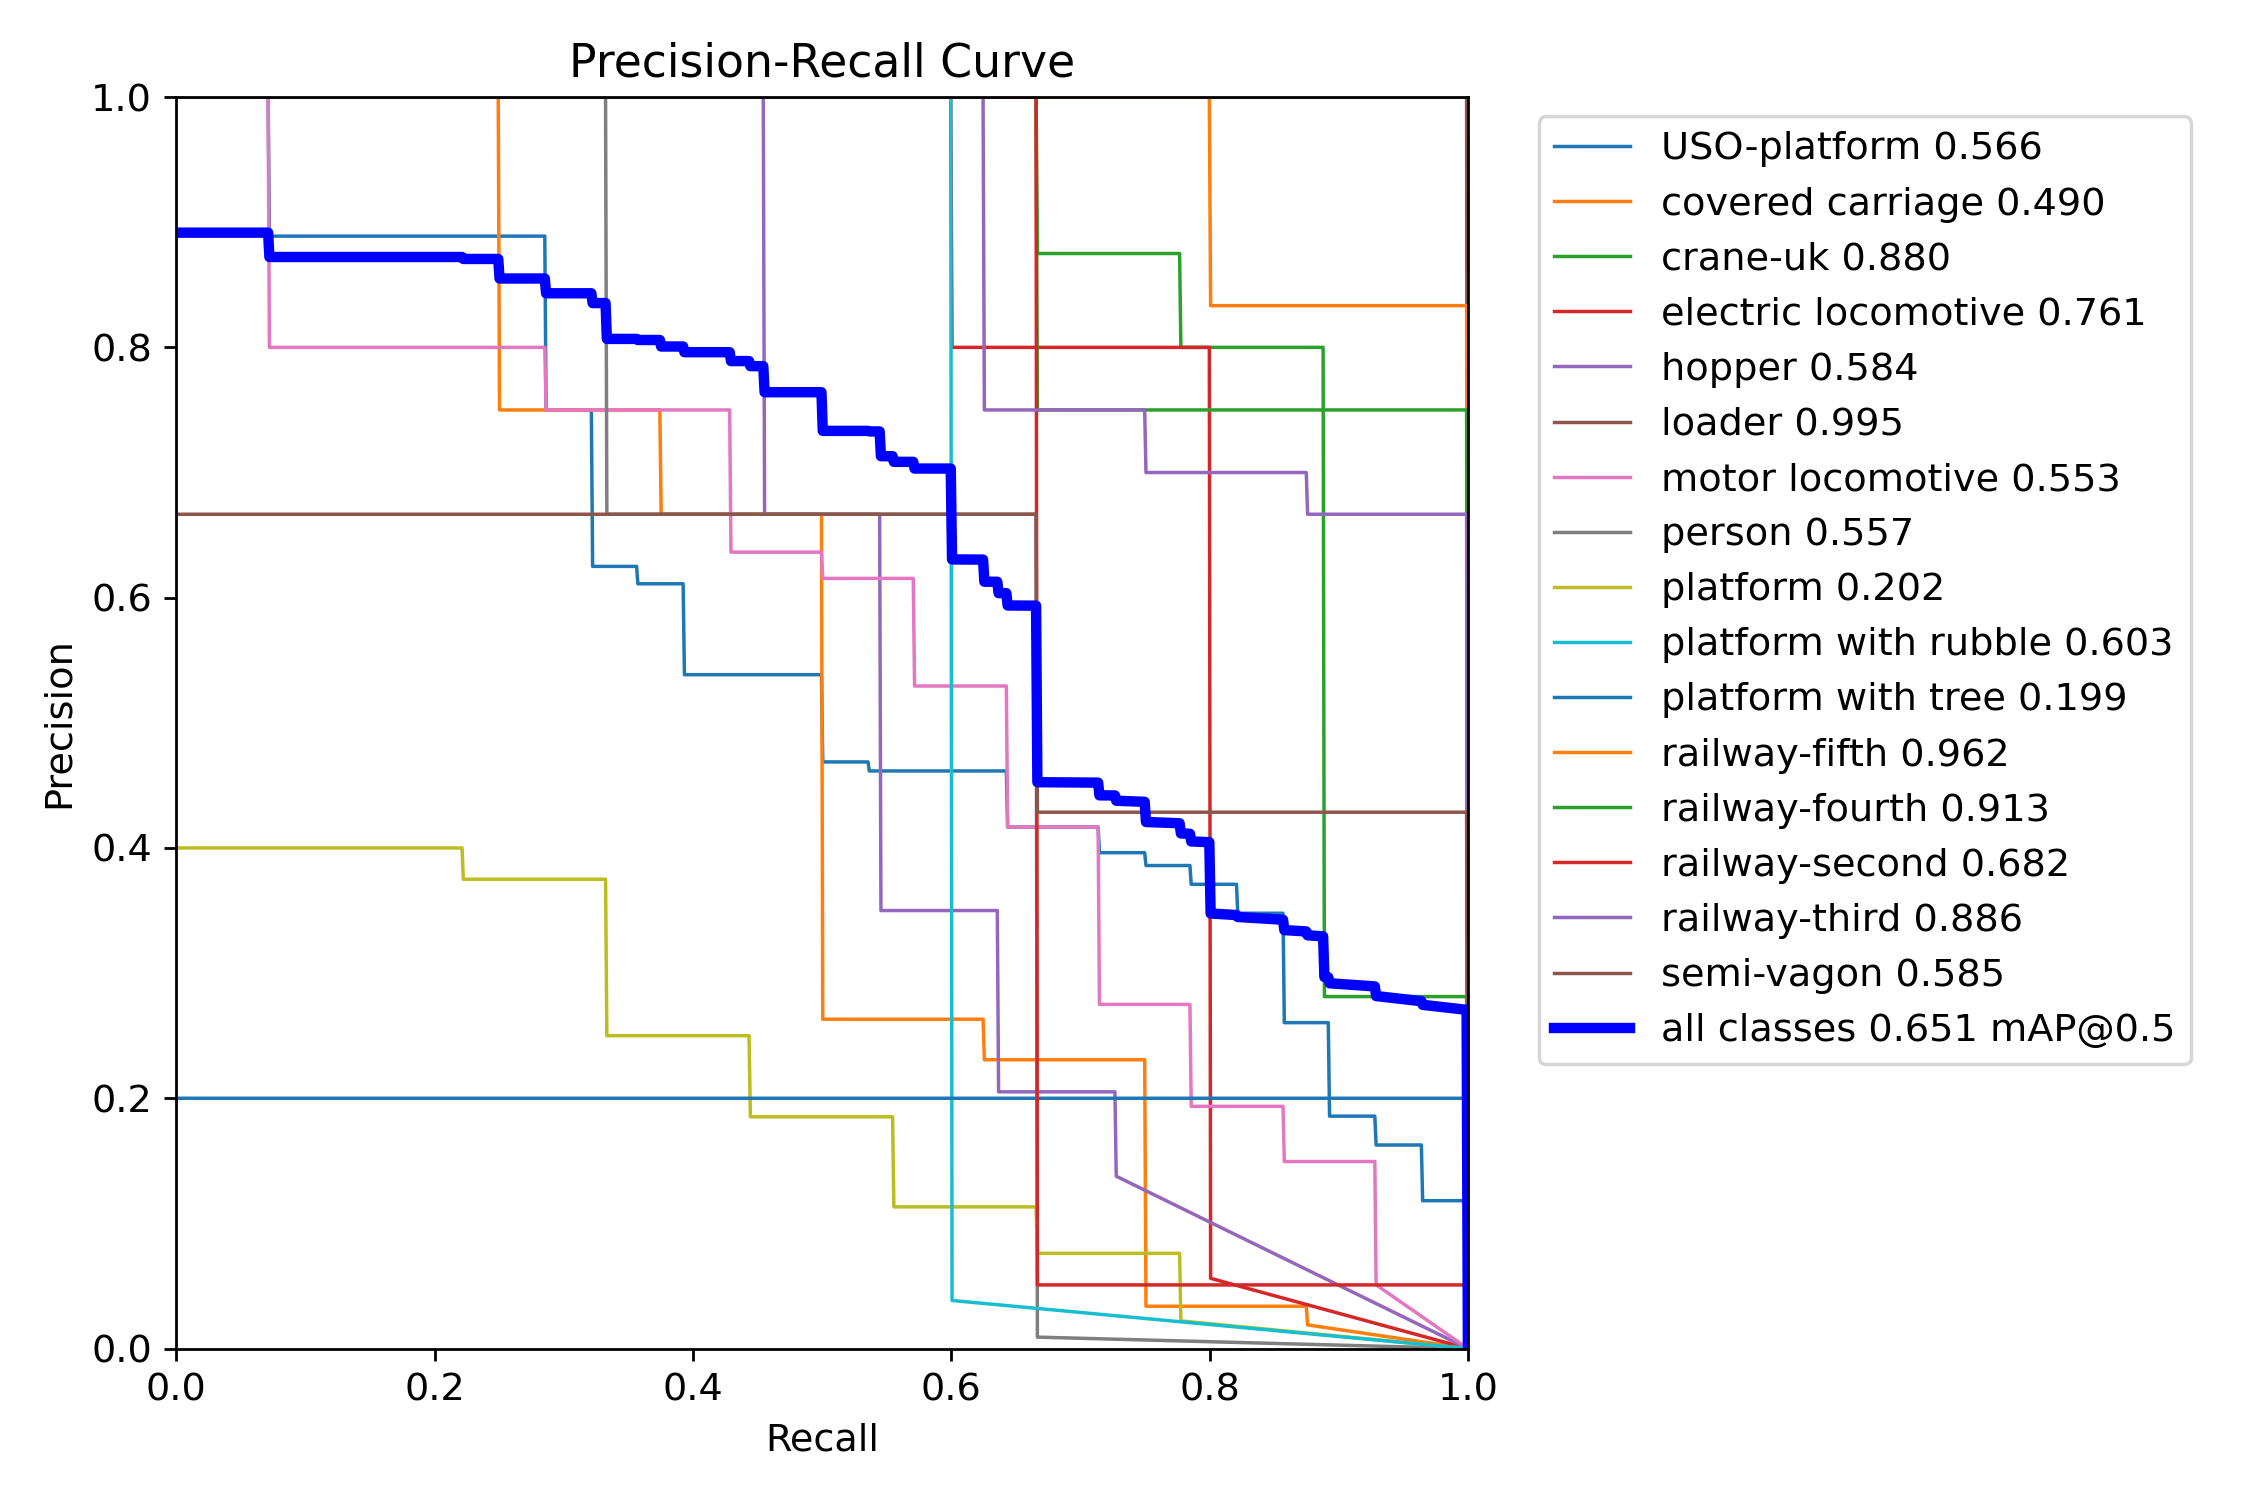

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

Пример на батче

/content


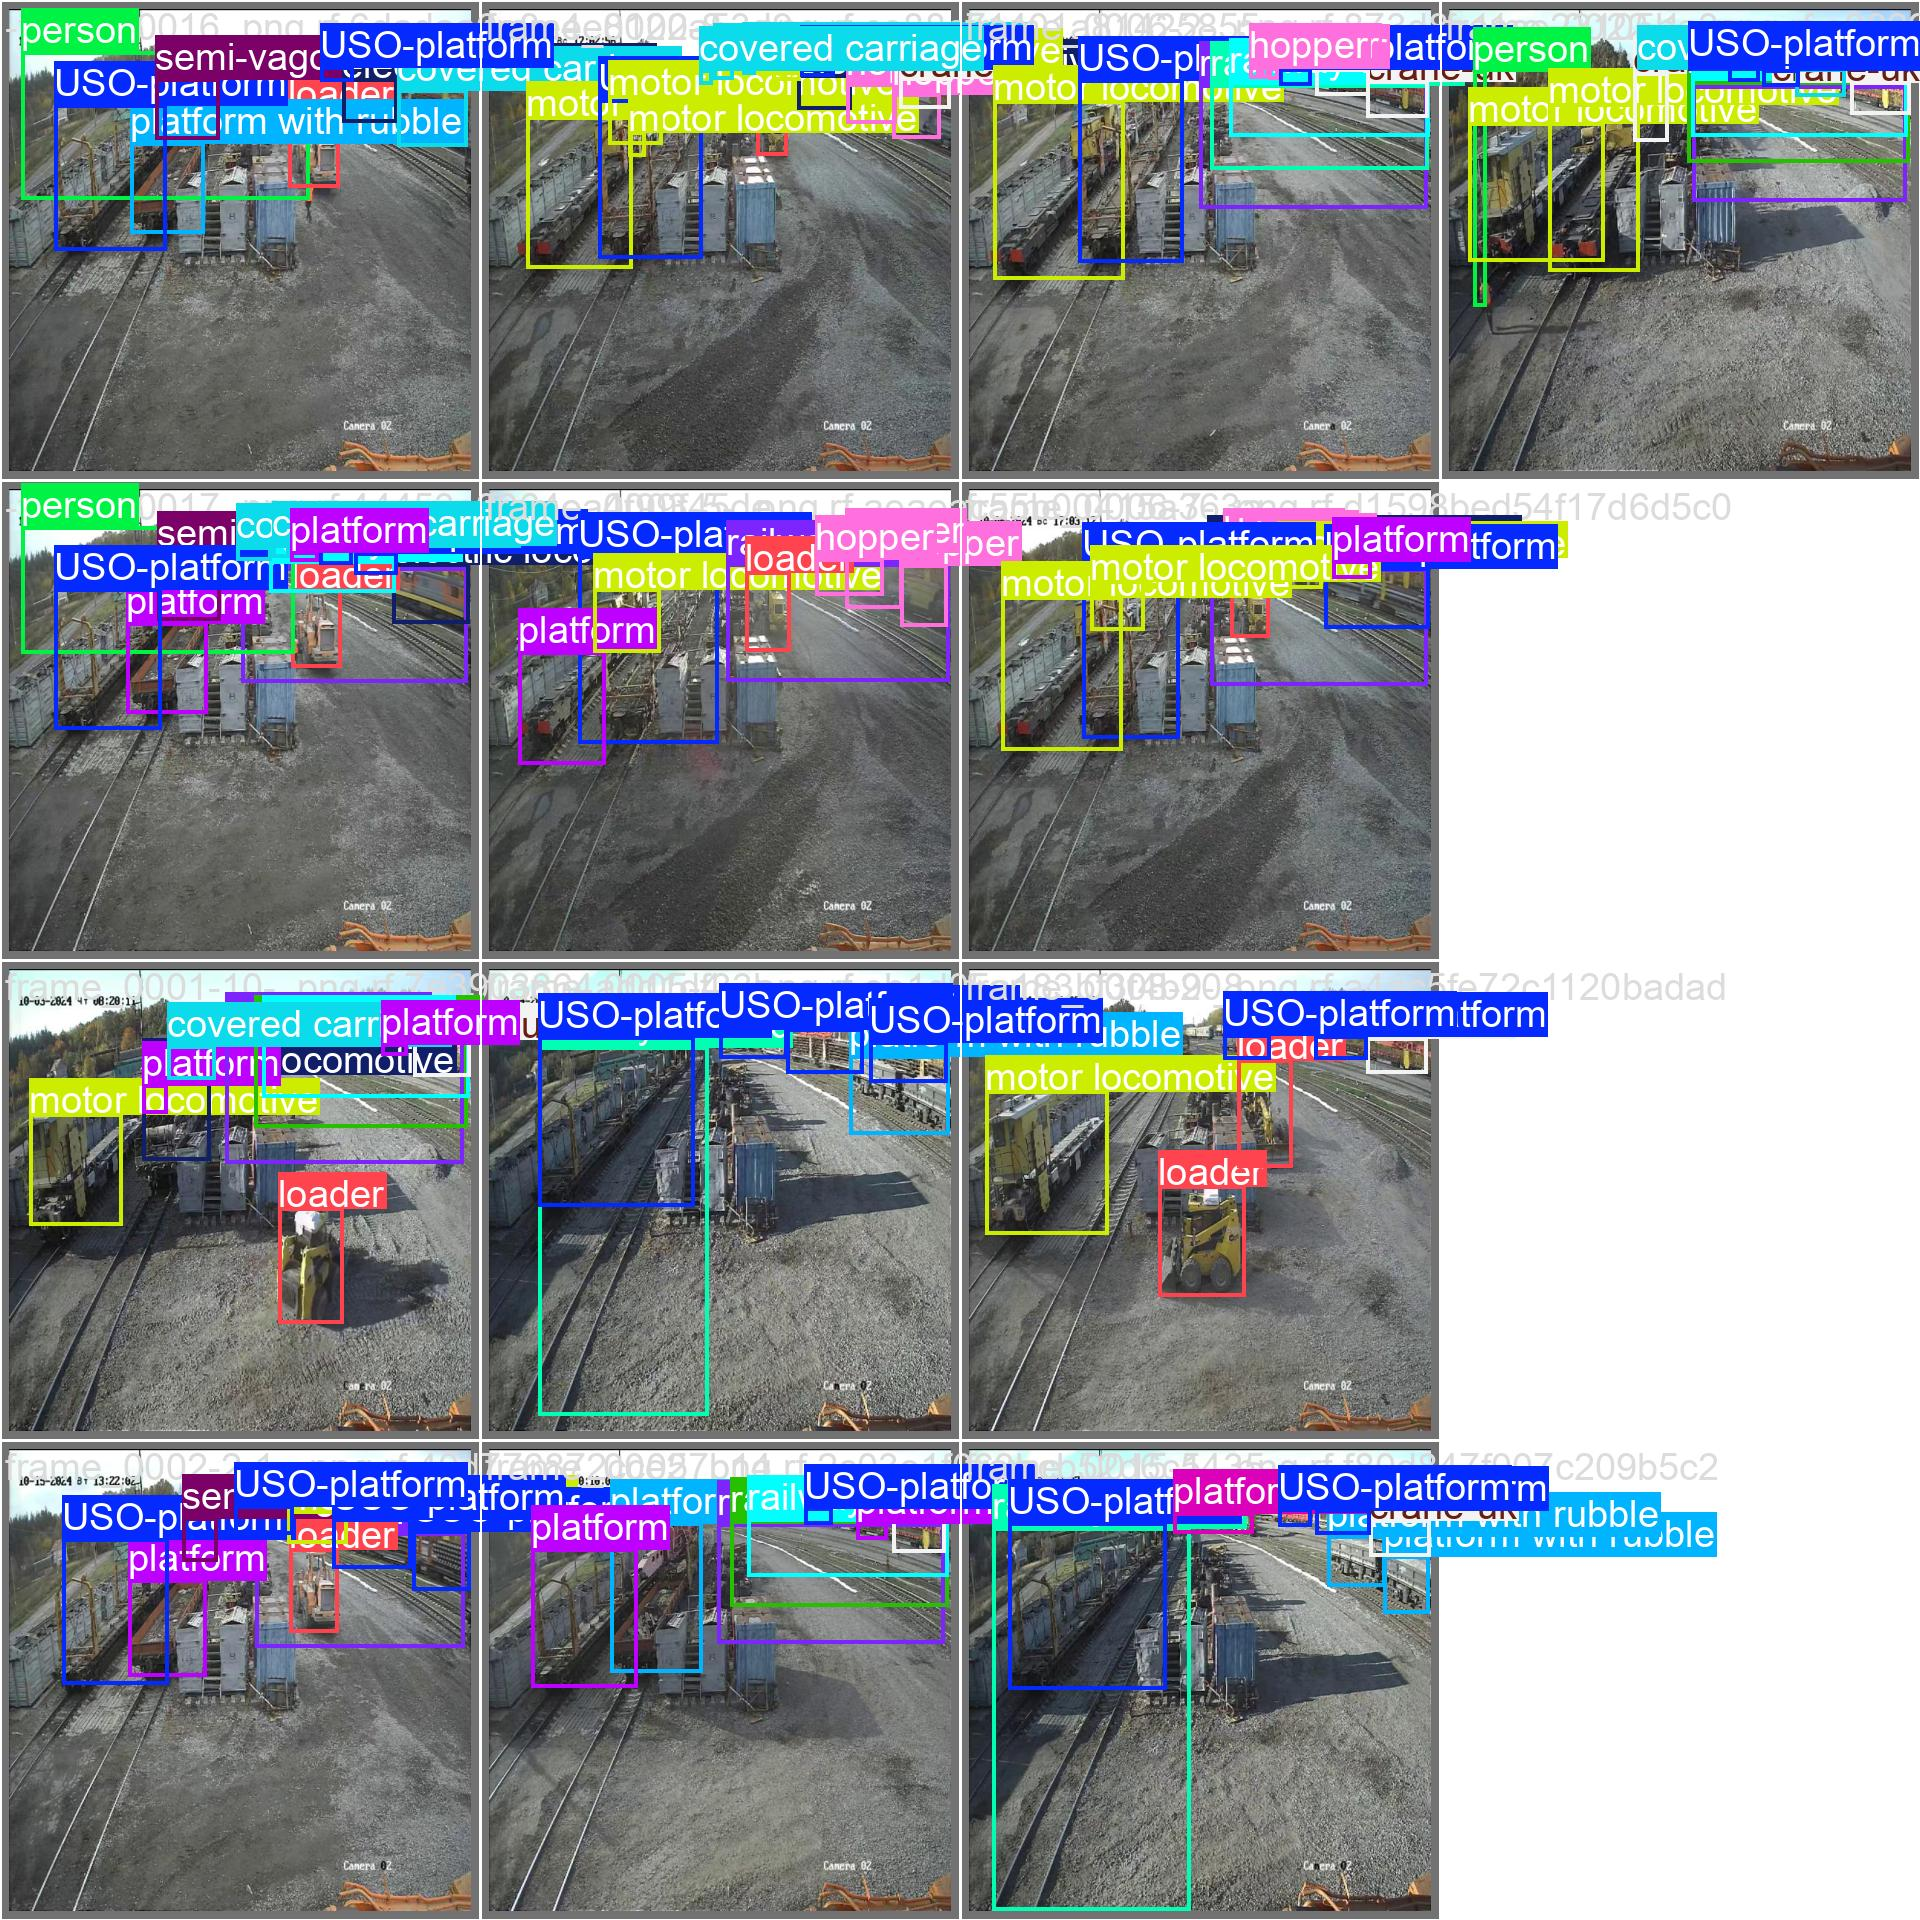

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_labels.jpg', width=1000)

/content


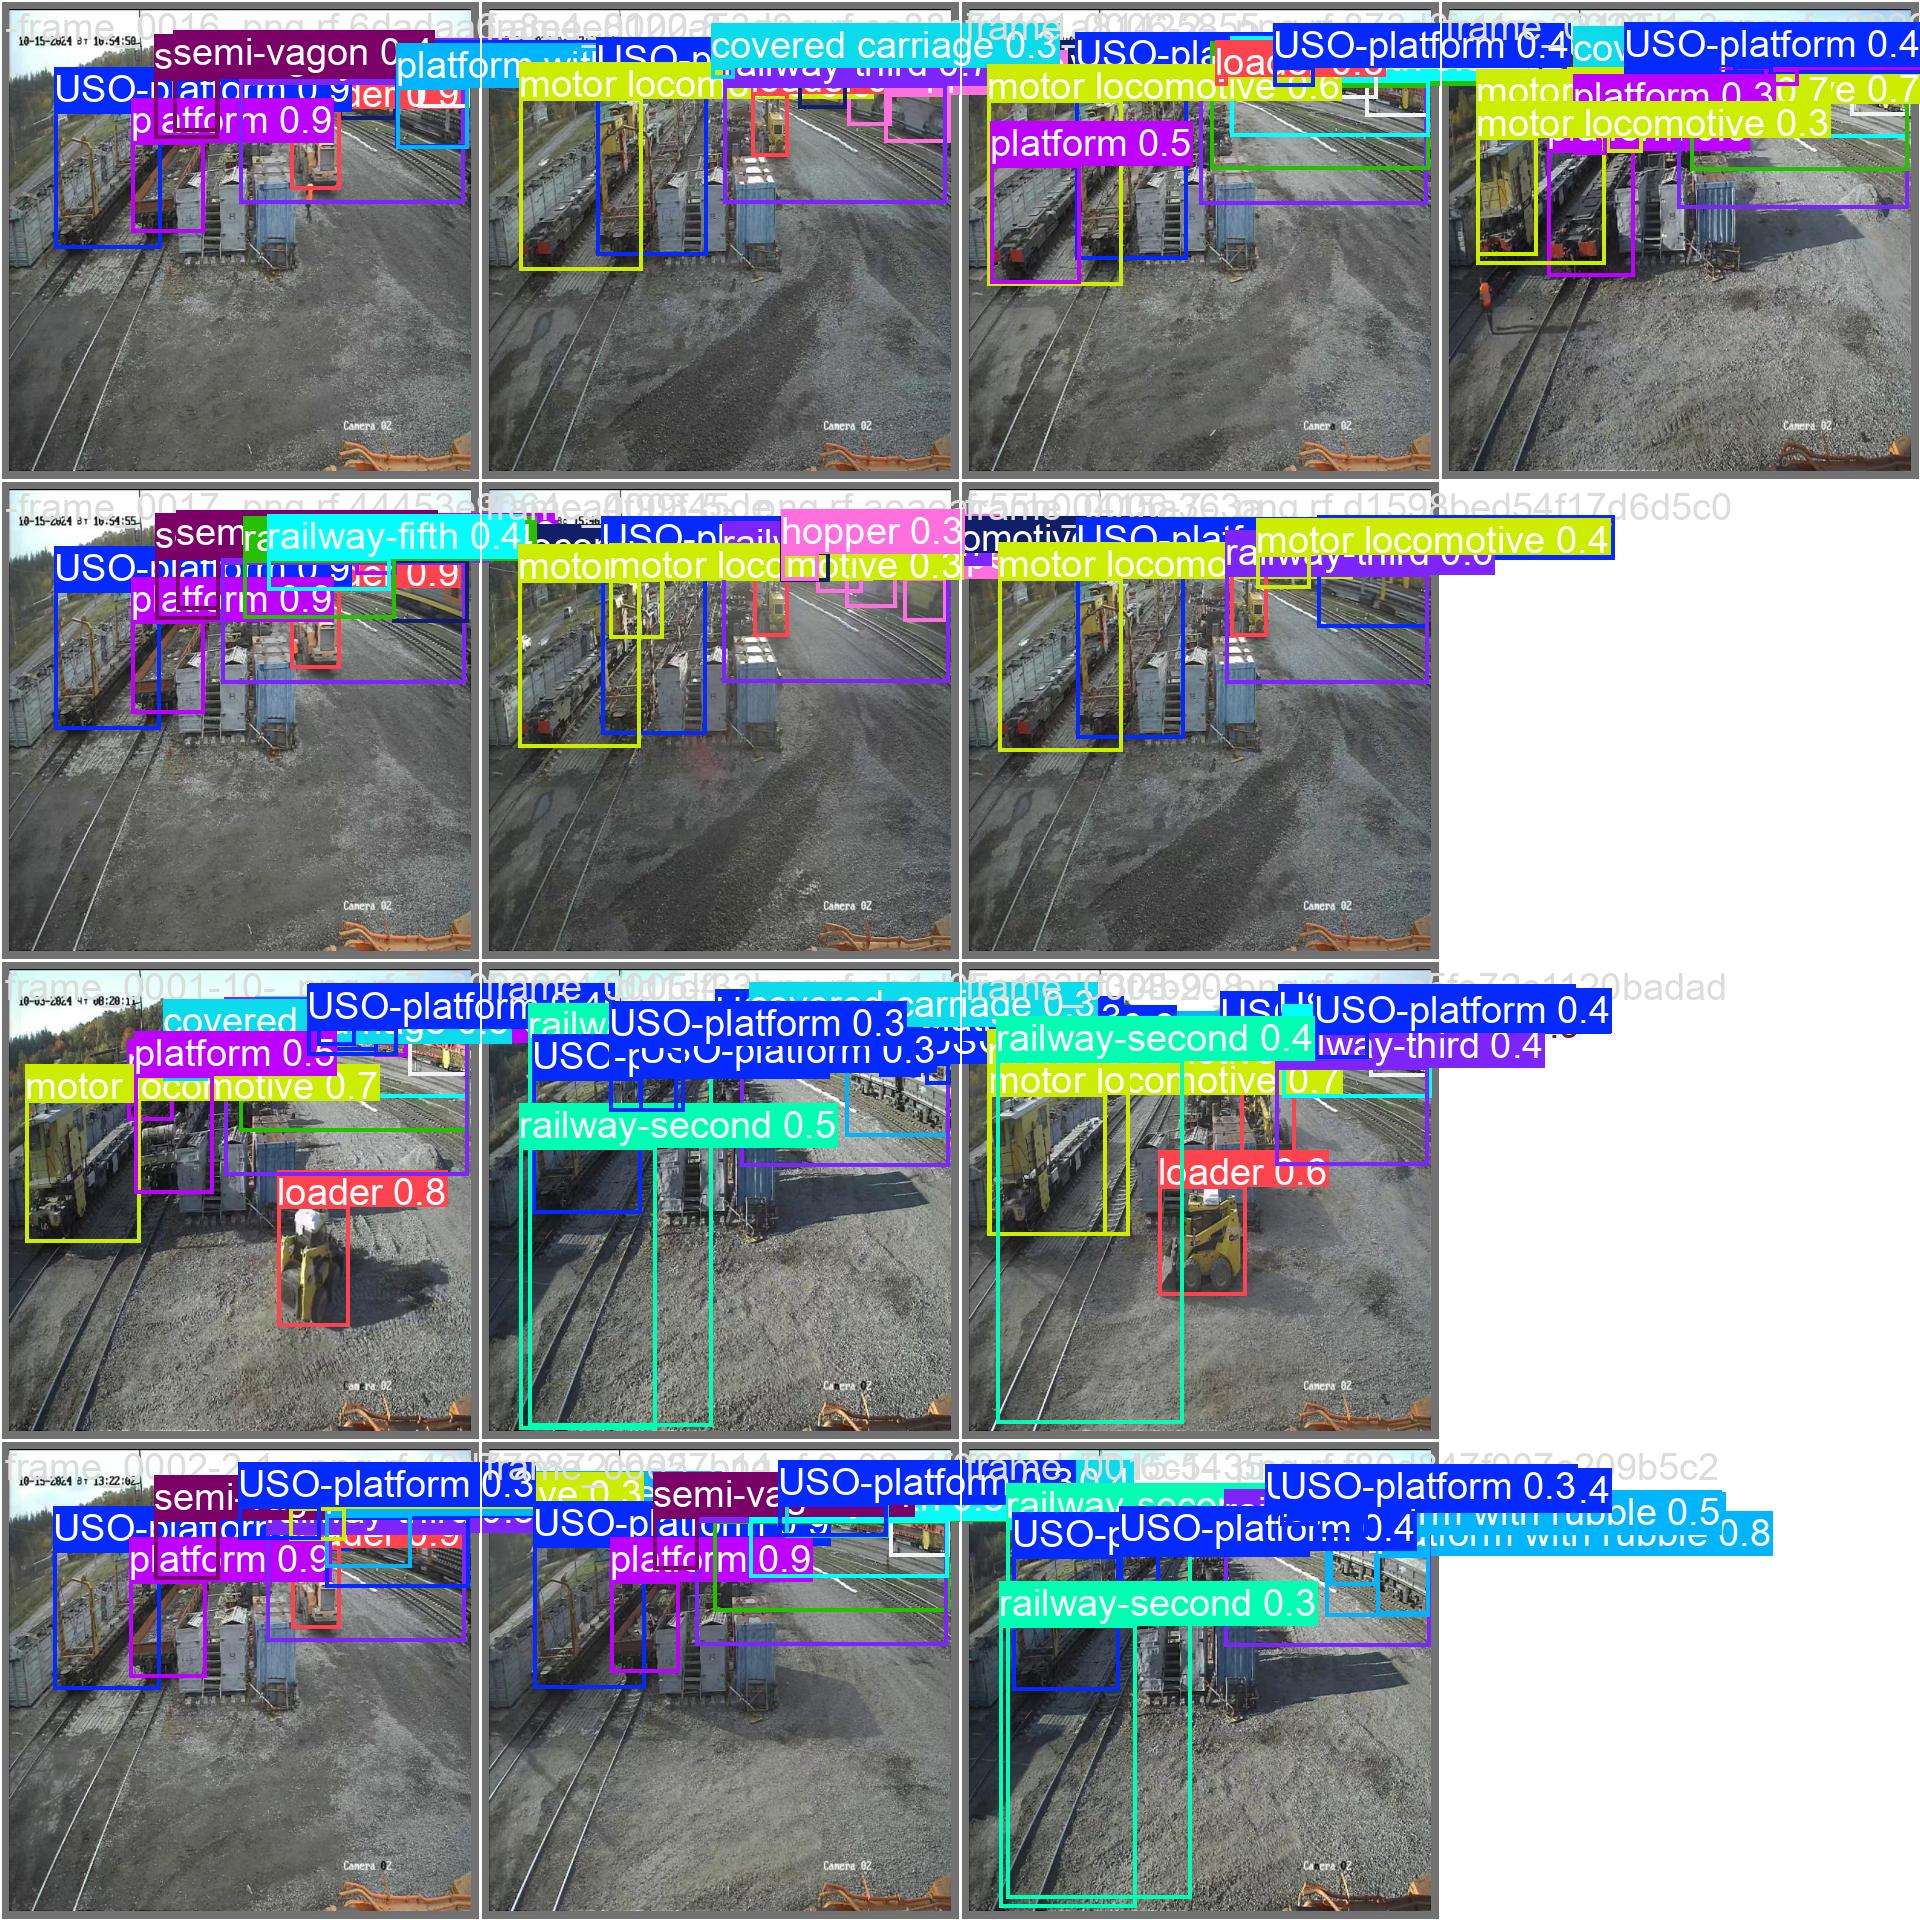

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=1000)

# Детекция объектов на одном изображении


image 1/1 /content/sceen_test_2.png: 800x768 3 USO-platforms, 2 covered carriages, 1 crane-uk, 3 loaders, 1 motor locomotive, 1 platform, 1 railway-fifth, 1 railway-fourth, 1 railway-third, 41.4ms
Speed: 4.9ms preprocess, 41.4ms inference, 618.0ms postprocess per image at shape (1, 3, 800, 768)
Обнаруженные метки: loader: 3 motor locomotive: 1 crane-uk: 1 USO-platform: 3 railway-fifth: 1 railway-fourth: 1 covered carriage: 2 platform: 1 railway-third: 1
Классы модели: {0: 'USO-platform', 1: 'covered carriage', 2: 'crane-uk', 3: 'diesel locomotive', 4: 'electric locomotive', 5: 'hopper', 6: 'loader', 7: 'motor locomotive', 8: 'person', 9: 'platform', 10: 'platform with rubble', 11: 'platform with tree', 12: 'railway-fifth', 13: 'railway-fourth', 14: 'railway-second', 15: 'railway-third', 16: 'semi-vagon'}

 Внимание! Обнаружены объекты следующих классов: loader


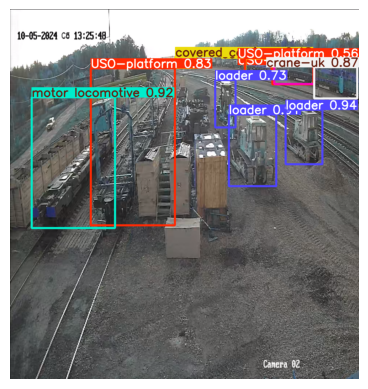

In [ ]:
import matplotlib.pyplot as plt

model = YOLO('/content/runs/detect/train/weights/best.pt')
img_path = 'The path to your image'

results = model(img_path)

# Извлечем все объекты, которые были задетекчены
labels = [result.names[int(cls)] for result in results for cls in result.boxes.cls]
counter = {}
for label in labels:
    counter[label] = counter.get(label, 0) + 1

output = ' '.join([f"{k}: {v}" for k, v in counter.items()])
print("Обнаруженные метки:", output)
print("Классы модели:", results[0].names)

# Отключим показ классов, связанных с детекцией путей
target_classes = ['railway-second', 'railway-third', 'railway-fourth', 'railway-fifth']
target_class_ids = [cls for cls in results[0].names if results[0].names[cls] in target_classes]
filtered_boxes = [box for box in results[0].boxes if int(box.cls) not in target_class_ids]
results[0].boxes = filtered_boxes
results_img = results[0].plot()

#Выбор классов наличие, которые должно отображаться дополнительно у диспетчера пр. человек на рельсах, либо наземная техника
alert_classes = ['loader', 'person']
alerts = [cls for cls in alert_classes if cls in labels]

# Вывод предупреждения в случае выявления классов
if alerts:
    print("\n Внимание! Обнаружены объекты следующих классов:", ", ".join(alerts))
else:
    print("\n На изображении нет объектов из указанных классов.")

plt.imshow(results_img)
plt.axis('off')
plt.show()

# Работа с видеоматериалом
В данном фрагменте мы создаем GIF, где добавляем интерфейс, который показывает:


*   Количество свободных путей и их номера
*   Предупреждение для диспетчера при нестандартных ситуациях

Далее мы создаем лог-файл в текстовом формате в котором указываем:


*   Точное время

*   Количество свободных путей
*   Какие в данное время объекты были задетекчены


*   Наличие предупреждения и от какого именно объекта

Запись в лог-файл будет происходить каждые 20 секунд





In [ ]:
import cv2
import time
from ultralytics import YOLO
from PIL import Image
from datetime import datetime
from IPython.display import display
import numpy as np
import os


model = YOLO('/content/runs/detect/train/weights/best.pt')

path_classes = {'railway-second', 'railway-third', 'railway-fourth', 'railway-fifth'}
target_paths = set(path_classes)

#Классы при которых происходит предупреждение диспетчера
alert_classes = ['loader', 'person']


video_path = '/content/с2.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    #Создание лог-файла
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = 0
    log_interval = int(fps * 20)

    log_file_path = '/content/railway_logs.txt'
    with open(log_file_path, 'w') as log_file:
        log_file.write("Time | Free Paths | Detected Classes | Alerts\n")
        log_file.write("-------------------------------------------------\n")

    processed_frames = []

    # Основной цикл обработки видео
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Выполняем предсказание на текущем кадре
        results = model(frame)
        detected_paths = set()
        detected_classes = set()
        alert_detected = []

        # Извлекаем метки классов и их координаты, пропуская классы путей
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls)
                class_name = result.names[cls_id]

                # Пропускаем классы путей при отрисовке
                if class_name in path_classes:
                    detected_paths.add(class_name)
                    continue
                detected_classes.add(class_name)

                # Проверяем, является ли класс из списка отслеживаемых
                if class_name in alert_classes:
                    alert_detected.append(class_name)

                # Получаем координаты бокса
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                # Рисуем бокс и имя класса на кадре
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Вычисляем количество свободных путей
        free_paths_count = len(target_paths - detected_paths)
        free_paths_list = list(target_paths - detected_paths)

        # Формируем сообщение предупреждения
        alert_message = ""
        if alert_detected:
            alert_message = "Warning! Objects detected: " + ", ".join(alert_detected)

        # Создаем полупрозрачную панель для информации
        overlay = frame.copy()
        panel_height = 80
        cv2.rectangle(overlay, (0, 0), (frame.shape[1], panel_height), (0, 0, 0), -1)
        frame = cv2.addWeighted(overlay, 0.4, frame, 0.6, 0)

        # Добавляем информацию на панель
        info_text = f"Free Paths: {free_paths_count} ({', '.join(free_paths_list)})"
        cv2.putText(frame, info_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        if alert_message:
            cv2.putText(frame, alert_message, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Конвертируем кадр в RGB и добавляем в список обработанных кадров
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        processed_frames.append(Image.fromarray(frame_rgb))

        # Логгирование данных каждые 20 секунд
        if frame_count % log_interval == 0:
            timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            log_entry = f"{timestamp} | {free_paths_count} | {', '.join(detected_classes)}"
            if alert_detected:
                log_entry += f" | ALERT: {', '.join(alert_detected)}\n"
            else:
                log_entry += " | No alerts\n"
            with open(log_file_path, 'a') as log_file:
                log_file.write(log_entry)
                log_file.flush()
                os.fsync(log_file.fileno())

        frame_count += 1

    # Создаем GIF из обработанных кадров
    gif_path = '/content/processed_railways_video.gif'
    processed_frames[0].save(gif_path, save_all=True, append_images=processed_frames[1:], duration=int(1000/fps), loop=0)

    # Отображаем GIF в Google Colab
    from IPython.display import Image as IPImage
    display(IPImage(filename=gif_path))

# Освобождаем ресурсы
cap.release()



0: 480x800 1 USO-platform, 1 crane-uk, 1 platform with rubble, 1 platform with tree, 3 railway-seconds, 1 railway-third, 45.7ms
Speed: 3.3ms preprocess, 45.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 USO-platform, 1 crane-uk, 1 platform with rubble, 2 platform with trees, 3 railway-seconds, 1 railway-third, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 USO-platform, 1 crane-uk, 2 platform with rubbles, 2 platform with trees, 3 railway-seconds, 1 railway-third, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 USO-platforms, 1 crane-uk, 2 platform with rubbles, 2 platform with trees, 3 railway-seconds, 1 railway-third, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 USO-platform, 1 crane-uk, 2 platform with rubbles, 1 platform with tree, 3 r

По итогу вы получаете GIF файл с отображением всех задетектченных классов, а также лог-файл.

Пример логов:


```
Time | Free Paths | Detected Classes | Alerts
-------------------------------------------------
2024-10-27 02:09:35 | 2 | USO-platform, platform with rubble, platform with tree, crane-uk | No alerts
```

